This notebook demonstrates the process of model fitting using the popular Iris flower dataset (https://archive.ics.uci.edu/ml/datasets/iris).

In [1]:
import numpy as np

# load data
X = np.loadtxt('iris.data', delimiter=',', usecols=[0,1,2,3], dtype=float)
y = np.loadtxt('iris.data', delimiter=',', usecols=[4], dtype=str)

target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# convert labels
y[y=='Iris-setosa'] = 0
y[y=='Iris-versicolor'] = 1
y[y=='Iris-virginica'] = 2
y = y.astype(np.int32)

### (1) Splitting Up Data Set

Split up the data into three parts: training set, validation set, and test set.

In [2]:
from sklearn.model_selection import train_test_split

# Let us use the helper function provided by the Scikit-Learn package. Note that this
# function already shuffles the data beforehand (the initial starting point, also called
# 'seed', is specified by the 'random_state' variable in Scikit-Learn)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=0)

### (2) Grid Search

We do not know a good assignment for the hyperparameter 'k' beforehand (which is called n_neighbors in the constructor of the 'KNeighborsClassifier' class). Hence, we have to "grid search" for it via a validation set. During this process, we monitor the **accuracy** (percentage of correctly classified instances) on the validation set.

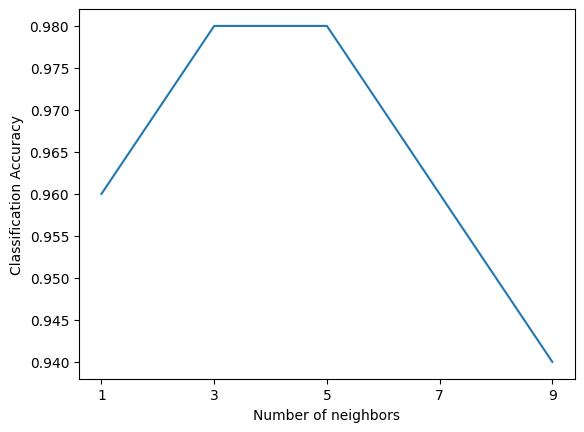

In [3]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# the "grid" of parameters to be tested
n_neighbors_range = [1,3,5,7,9]

# For each k, we compute the accuracy on the validation set
# (accuracy = percentage of correctly classified instances)

validation_accuracies = []
for k in n_neighbors_range:
    
    # instantiate model and fit model
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_tr, y_tr)
    
    # compute accuracy on validation set
    val_preds = model.predict(X_val)
    acc = accuracy_score(val_preds, y_val)
    
    validation_accuracies.append(acc)
    
# plot the induced validation accuracies
plt.plot(n_neighbors_range, validation_accuracies)
plt.xlabel('Number of neighbors')
plt.xticks(n_neighbors_range)
plt.ylabel('Classification Accuracy')
plt.show()    

### (3) Final Model

Finally, we pick the model that performs best w.r.t. the accuracy on the validation set and use **all the training data** to fit the final model. 

In [4]:
# select best k
best_k_idx = np.argmax(np.array(validation_accuracies))
best_k = n_neighbors_range[best_k_idx]
print("Best model parameter: {}".format(best_k))

Best model parameter: 3


In [5]:
# fit final model
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### (4) Final Model Evaluation
We can then also compute the accuracy on the test set (**which has not been used so far!**). This (hopefully) gives us a realistic estimate of how our model will perform in future on new, unseen instances ...

In [6]:
# get predictions for test set
preds = final_model.predict(X_test)

# your friend:
final_accuracy = accuracy_score(y_test, preds)
print("Accuracy on test set: {}".format(final_accuracy))

Accuracy on test set: 0.96


The test accuracy computed above already allows to assess the performance of the model. If more insights are needed, one can resort to, e.g., confusion matrices. Note that the Iris data set gives rise to a **rather "simple" machine learning classification task**, i.e., one can quickly obtain a classifier that solves the task "perfectly" ...

Text(0.5, 1.0, 'Confusion Matrix (kNN Classifier)')

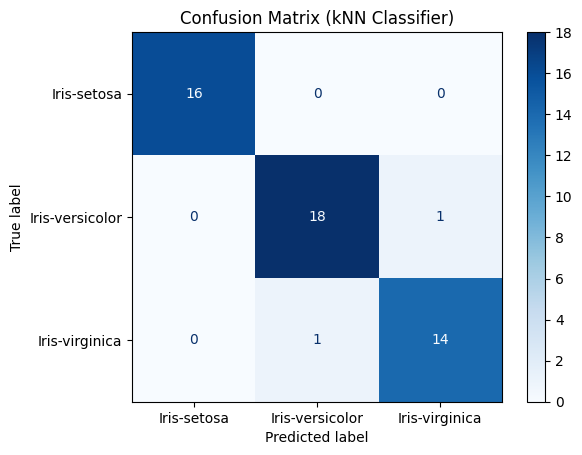

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(final_model, X_test, y_test,
                             display_labels=target_names,
                             cmap=plt.cm.Blues,
                             normalize=None,
                             values_format='.5g')
disp.ax_.set_title("Confusion Matrix (kNN Classifier)")